Импорт библиотек и загрузка данных

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Загрузка данных о жилье в Калифорнии
housing = fetch_california_housing(as_frame=True)
data = housing.frame


Применение Yeo-Johnson преобразования

In [6]:
# Выберем для преобразования признак "MedInc" (средний доход)
pt = PowerTransformer(method='yeo-johnson')
data['MedInc_transformed'] = pt.fit_transform(data[['MedInc']])
print(data[[numerical_feature, numerical_feature + '_transformed']].head())


   MedInc  MedInc_transformed
0  8.3252            1.903289
1  8.3014            1.897081
2  7.2574            1.604361
3  5.6431            1.051321
4  3.8462            0.205878


Выбор 5% лучших признаков

In [4]:
# Независимые переменные
X = data.drop('MedHouseVal', axis=1)  # Удаляем целевую переменную для выбора признаков

# Зависимая переменная
y = data['MedHouseVal']

# Выбор 5% лучших признаков с использованием mutual_info_regression
selector = SelectPercentile(score_func=mutual_info_regression, percentile=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Вывод выбранных признаков
print("Выбранные признаки:", selected_features)


Выбранные признаки: Index(['Longitude'], dtype='object')


Построение диаграммы рассеяния для двух произвольных колонок

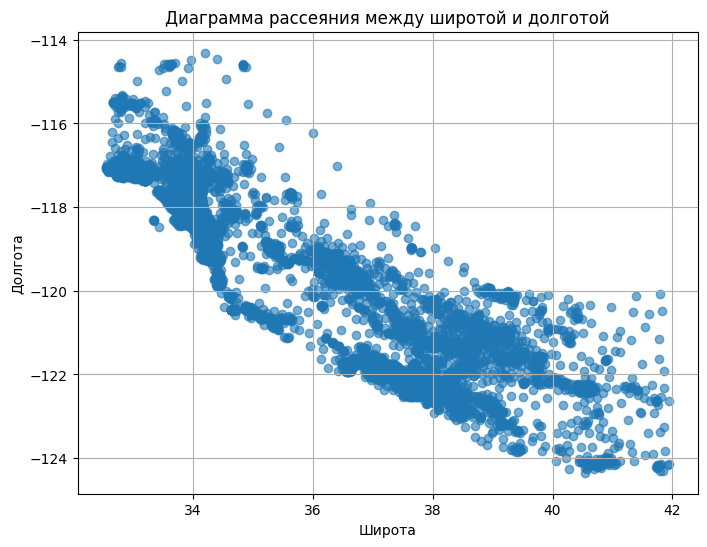

In [5]:
# Выберем признаки "Latitude" и "Longitude" для диаграммы рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(data['Latitude'], data['Longitude'], alpha=0.6)
plt.title('Диаграмма рассеяния между широтой и долготой')
plt.xlabel('Широта')
plt.ylabel('Долгота')
plt.grid(True)
plt.show()
